In [1]:
# import and normalize the full MNIST digits dataset

from sklearn.datasets import fetch_openml
X, y = fetch_openml(name='mnist_784', version=1, data_id=None, return_X_y=True)

X *= 1. / 255

In [2]:
# select the first "n" images with label in "labels"

from tools import select_data

images = select_data(dataset=(X,y), n=100, labels=[0,2])

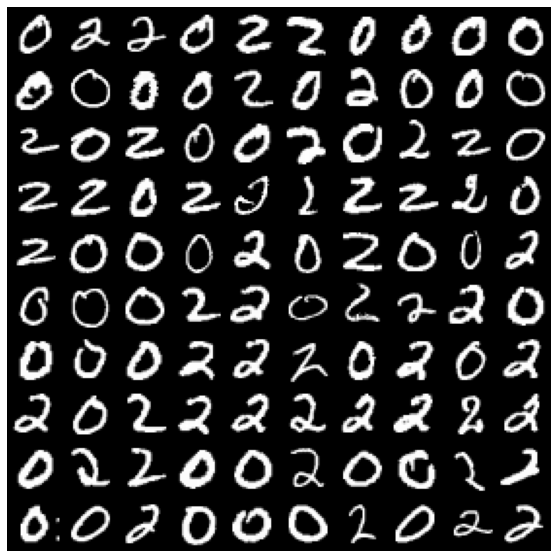

In [3]:
# show the selected images

from tools import view_images

view_images(images=images, dims=(28,28))

In [4]:
# define and train the model (with lateral inhibition)

from biolearn.model.bcm import BCM
from biolearn.utils.optimizer import Adam
from biolearn.utils.weights import Normal

model = BCM(outputs=100, num_epochs=500, batch_size=100, activation='relu',
            optimizer=Adam(), weights_init=Normal(mu=0., std=0.001),
            interaction_strength=-0.005, random_state=42, verbose=False)

model.fit(X=images)

BCM(num_epochs=500, optimizer=Adam(decay=0.0, lr_min=0.0, lr_max=inf, lr=0.02), random_state=42, weights_init=Normal(std=0.001, mu=0.0), epochs_for_convergency=500, orthogonalization=False, activation=Relu(), batch_size=100, outputs=100, interaction_strength=-0.005, verbose=False, precision=1e-30, convergency_atol=0.01)

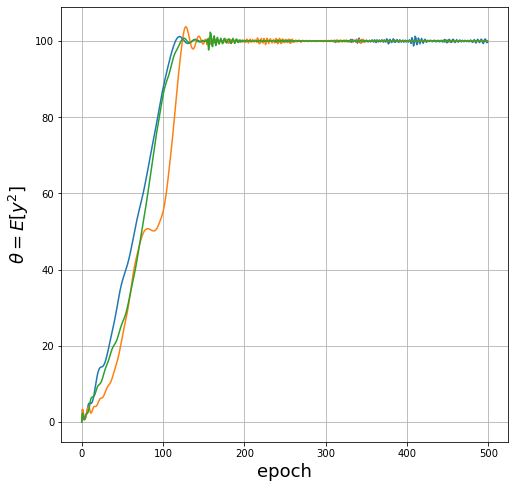

In [5]:
# plot the theta function for the neurons in "outputs"

from tools import plot_theta

plot_theta(model, outputs=[0,1,2])

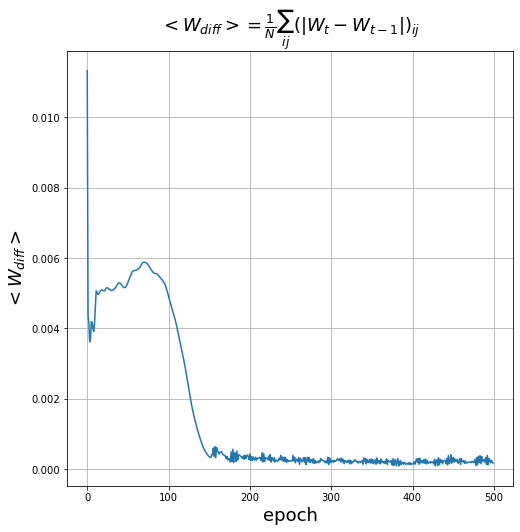

In [6]:
# check the synaptic weights stability

from tools import plot_weights_meandiff

plot_weights_meandiff(model)

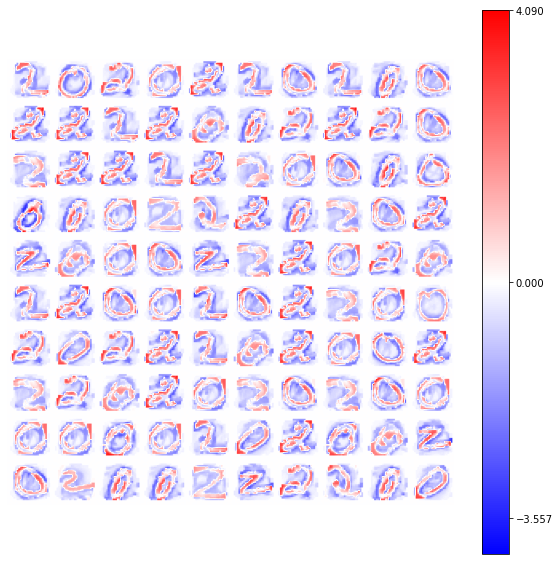

In [7]:
# show the receptive fields of all the neurons

from biolearn.utils.misc import view_weights

view_weights(weights=model.weights, dims=(28, 28))